In [65]:
http://www.spotrac.com/mlb/statistics/player/

SyntaxError: invalid syntax (<ipython-input-65-005b8d52ec37>, line 1)

In [6]:
from __future__ import print_function, division
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import defaultdict

In [288]:
url = 'http://www.spotrac.com/mlb/statistics/player/' #webiste containing the data

response = requests.get(url)

In [290]:
print(response.text)

<!doctype html >
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<!-- start:global -->
<meta charset="utf-8">
<!-- end:global -->

<!-- start:page title -->
<title>MLB Statistics | Spotrac</title>
<meta name="keywords" content="MLB contracts, details, breakdowns, guaranteed money, earnings" />
<meta name="description" content="A real-time, sortable list of active MLB contracts including total value, guaranteed money, and complete salary breakdowns." />
<meta property="og:title" content="MLB Contracts" />
<meta property="og:site_name" content="Spotrac.com" />
<meta property="og:image" content="http://d1dglpr230r57l.cloudfront.net/images/thumb/mlb.png" />
<!-- end:meta inf

In [291]:
page = response.text

In [292]:
soup = BeautifulSoup(page,"lxml")

In [294]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-US">
 <!--<![endif]-->
 <head>
  <!-- start:global -->
  <meta charset="utf-8"/>
  <!-- end:global -->
  <!-- start:page title -->
  <title>
   MLB Statistics | Spotrac
  </title>
  <meta content="MLB contracts, details, breakdowns, guaranteed money, earnings" name="keywords"/>
  <meta content="A real-time, sortable list of active MLB contracts including total value, guaranteed money, and complete salary breakdowns." name="description"/>
  <meta content="MLB Contracts" property="og:title"/>
  <meta content="Spotrac.com" property="og:site_name"/>
  <meta content="http://d1dglpr230r57l.cloudfront.net/images/thumb/mlb.png" property="og:ima

In [295]:
#collects data and puts it in something we can work with

tables=soup.find_all("table")
rows=[row for row in tables[0].find_all('tr')]

# Just want to look at 1st 20 rows for now
rows=rows[1:]

batters={}
for row in rows:
    items=row.find_all('td')
    player=items[1].find('a')
    batters[player]=[i.text for i in items]
    

list(batters.items())
len(batters)




227

In [297]:
#will change the string of dollars into an integer that we can work with.
def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '').replace(' ','')
    return int(moneystring)

In [298]:
#removes the key and turns the rest into a list of lists
i = 0
batlist = []
while i < len(batters):
    batlist.append(list(batters.items())[i][1])
    i = i + 1

In [300]:
#splits the name and position into different elements of the list.
i = 0
while i < len(batlist):
    batlist[i].extend(batlist[i][1].split(' '))
    i = i + 1

In [302]:
#removes the name string from the front

i = 0
while i < len(batlist):
    batlist[i] = batlist[i][:1]+batlist[i][2:]
    i = i + 1

In [304]:
#removes the period from the last names

i = 0
while i < len(batlist):
    batlist[i][-2] = batlist[i][-2].replace('.','')
    i = i + 1

In [305]:
#converts the salary string into an integer
i = 0
while i < len(batlist):
    batlist[i][16] = money_to_int(batlist[i][16])
    i = i + 1

In [307]:
#sets up the headers and creates a data frame
Headers = ['RANK', 'TEAM', 'GP', 'AB', 'H', 'R', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP', 'SLG', 'OPS', 'SALARY', 'FIRST', 'LAST', 'POSITION']
batdf = pd.DataFrame(batlist)

In [308]:
batdf.columns = Headers

In [309]:
batdf

,RANK,TEAM,GP,AB,H,R,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS,SALARY,FIRST,LAST,POSITION
0,1,CHC,126,432,112,59,15,4,11,59,41,67,0.259,0.326,0.389,0.653,28166666,Jason,Heyward,RF
1,2,DET,130,469,117,50,22,0,16,60,54,110,0.249,0.329,0.399,0.658,28000000,Miguel,Cabrera,1B
2,3,LAA,149,593,143,53,17,0,23,101,37,93,0.241,0.286,0.386,0.572,26000000,Albert,Pujols,DH
3,4,SEA,150,592,166,79,33,0,23,97,49,85,0.280,0.338,0.453,0.676,24000000,Robinson,Cano,2B
4,5,MIN,141,525,161,69,36,1,7,71,66,83,0.307,0.385,0.419,0.771,23000000,Joe,Mauer,1B
5,6,BOS,133,496,120,58,24,0,23,62,51,116,0.242,0.320,0.429,0.640,22750000,Hanley,Ramirez,DH
6,7,NYM,81,291,85,46,17,2,17,42,26,61,0.292,0.352,0.540,0.704,22500000,Yoenis,Cespedes,CF
7,8,SF,140,494,158,62,34,0,12,67,61,66,0.320,0.400,0.462,0.799,22177777,Buster,Posey,C
8,9,CIN,162,559,179,106,34,1,36,100,134,83,0.320,0.454,0.578,0.908,22000000,Joey,Votto,1B
9,10,ATL,115,438,121,47,23,1,19,64,27,99,0.276,0.318,0.463,0.635,21500000,Matt,Kemp,RF


In [271]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os

In [272]:
chromedriver = "/Users/gilliangoodman/Downloads/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.get("http://www.spotrac.com/mlb/statistics/player/")

In [313]:
soup2 = BeautifulSoup(driver.page_source, 'html.parser')

In [314]:
print(soup2.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
 <!--<![endif]-->
 <head>
  <!-- start:global -->
  <meta charset="utf-8"/>
  <!-- end:global -->
  <!-- start:page title -->
  <title>
   MLB Statistics | Spotrac
  </title>
  <meta content="MLB contracts, details, breakdowns, guaranteed money, earnings" name="keywords"/>
  <meta content="A real-time, sortable list of active MLB contracts including total value, guaranteed money, and complete salary breakdowns." name="description"/>
  <meta content="MLB Contracts" property="og:title"/>
  <meta content="Spotrac.com" property="og:site_name"/>
  <meta content="http://d1dglpr230r57l.cloudfront.net/i

In [315]:
#collects the data from the html and puts it in something we can work with

tables=soup2.find_all("table")
rows=[row for row in tables[0].find_all('tr')]


rows=rows[1:]

pitchers={}
for row in rows:
    items=row.find_all('td')
    player=items[1].find('a')
    pitchers[player]=[i.text for i in items]
    

list(pitchers.items())




[(<a href="http://www.spotrac.com/redirect/player/5273/">Clayton Kershaw. SP</a>,
  ['1',
   'Clayton Kershaw. SP',
   'LAD',
   '27',
   '27',
   '175.0',
   '136',
   '49',
   '45',
   '30',
   '202',
   '18',
   '4',
   '0',
   '2.31',
   '0.949',
   '$35,571,428 ']),
 (<a href="http://www.spotrac.com/redirect/player/407/">Zack Greinke. SP</a>,
  ['2',
   'Zack Greinke. SP',
   'ARI',
   '33',
   '32',
   '202.1',
   '172',
   '80',
   '72',
   '45',
   '215',
   '17',
   '7',
   '0',
   '3.20',
   '1.072',
   '$34,000,000 ']),
 (<a href="http://www.spotrac.com/redirect/player/310/">Justin Verlander. SP</a>,
  ['3',
   'Justin Verlander. SP',
   'HOU',
   '33',
   '33',
   '206.0',
   '170',
   '80',
   '77',
   '72',
   '219',
   '15',
   '8',
   '0',
   '3.36',
   '1.175',
   '$28,000,000 ']),
 (<a href="http://www.spotrac.com/redirect/player/93/">Jon Lester. SP</a>,
  ['4',
   'Jon Lester. SP',
   'CHC',
   '32',
   '32',
   '180.2',
   '179',
   '101',
   '87',
   '60',
   '180'

In [316]:
#removes the key and makes the rest into a list of lists

i = 0
pitchlist = []
while i < len(pitchers):
    pitchlist.append(list(pitchers.items())[i][1])
    i = i + 1

In [318]:
#adds the first and last names and posistion to the end of each list

i = 0
while i < len(pitchlist):
    pitchlist[i].extend(pitchlist[i][1].split(' '))
    i = i + 1

In [320]:
#removes the name string from the begining 

i = 0
while i < len(pitchlist):
    pitchlist[i] = pitchlist[i][:1]+pitchlist[i][2:]
    i = i + 1

In [322]:
#change the string salary into an integer

i = 0
while i < len(pitchlist):
    pitchlist[i][15] = money_to_int(pitchlist[i][15])
    i = i + 1

In [324]:
#remove the period from the last name

i = 0
while i < len(pitchlist):
    pitchlist[i][-2] = pitchlist[i][-2].replace('.','')
    i = i + 1

In [332]:
#lay out headers and create my data frame

Headers2 = ['RANK', 'TEAM', 'GP', 'GS', 'IP', 'H', 'R', 'ER', 'BB', 'SO', 'W', 'L', 'SV', 'ERA', 'WHIP', 'SALARY', 'FIRST', 'LAST', 'POSITION']
pitchdf = pd.DataFrame(pitchlist)

In [334]:
#needed to drop a player because his name added unnecessary columns.  jorge de la hoya name is in an abnormal 
#structure so it was easier to delete.  this should not affect the data much.

pitchdf.drop(pitchdf.index[145])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,LAD,27,27,175.0,136,49,45,30,202,...,4,0,2.31,0.949,35571428,Clayton,Kershaw,SP,None,None
1,2,ARI,33,32,202.1,172,80,72,45,215,...,7,0,3.20,1.072,34000000,Zack,Greinke,SP,None,None
2,3,HOU,33,33,206.0,170,80,77,72,219,...,8,0,3.36,1.175,28000000,Justin,Verlander,SP,None,None
3,4,CHC,32,32,180.2,179,101,87,60,180,...,8,0,4.33,1.323,25000000,Jon,Lester,SP,None,None
4,5,NYY,27,27,148.2,139,64,61,50,120,...,5,0,3.69,1.271,25000000,C.C.,Sabathia,SP,None,None
5,6,SF,25,25,147.1,160,77,74,53,136,...,8,0,4.52,1.446,23500000,Johnny,Cueto,SP,None,None
6,7,TEX,24,24,148.0,125,74,69,53,105,...,6,0,4.20,1.203,22500000,Cole,Hamels,SP,None,None
7,8,WSH,31,31,200.2,126,62,56,55,268,...,6,0,2.51,0.902,22142857,Max,Scherzer,SP,None,None
8,9,NYY,30,30,178.1,180,100,94,41,194,...,12,0,4.74,1.239,22000000,Masahiro,Tanaka,SP,None,None
9,10,CHW,21,21,117.0,116,72,68,53,103,...,7,0,5.23,1.444,21000000,James,Shields,SP,None,None


In [337]:
pitchdf = pitchdf.drop([19, 20], 1)

In [338]:
pitchdf.columns = Headers2

In [339]:
pitchdf

,RANK,TEAM,GP,GS,IP,H,R,ER,BB,SO,W,L,SV,ERA,WHIP,SALARY,FIRST,LAST,POSITION
0,1,LAD,27,27,175.0,136,49,45,30,202,18,4,0,2.31,0.949,35571428,Clayton,Kershaw,SP
1,2,ARI,33,32,202.1,172,80,72,45,215,17,7,0,3.20,1.072,34000000,Zack,Greinke,SP
2,3,HOU,33,33,206.0,170,80,77,72,219,15,8,0,3.36,1.175,28000000,Justin,Verlander,SP
3,4,CHC,32,32,180.2,179,101,87,60,180,13,8,0,4.33,1.323,25000000,Jon,Lester,SP
4,5,NYY,27,27,148.2,139,64,61,50,120,14,5,0,3.69,1.271,25000000,C.C.,Sabathia,SP
5,6,SF,25,25,147.1,160,77,74,53,136,8,8,0,4.52,1.446,23500000,Johnny,Cueto,SP
6,7,TEX,24,24,148.0,125,74,69,53,105,11,6,0,4.20,1.203,22500000,Cole,Hamels,SP
7,8,WSH,31,31,200.2,126,62,56,55,268,16,6,0,2.51,0.902,22142857,Max,Scherzer,SP
8,9,NYY,30,30,178.1,180,100,94,41,194,13,12,0,4.74,1.239,22000000,Masahiro,Tanaka,SP
9,10,CHW,21,21,117.0,116,72,68,53,103,5,7,0,5.23,1.444,21000000,James,Shields,SP


In [341]:
# Pickle your pandas dataframe
pitchdf.to_pickle('pitching_data_dataframe.pkl')

In [343]:
#Now that we have our data frames we need to convert the number entries into floats 

pitchdf[['GP', 'GS', 'IP', 'H', 'R', 'ER', 'BB', 'SO', 'W', 'L', 'SV', 'ERA', 'WHIP']] = pitchdf[['GP', 'GS', 'IP', 'H', 'R', 'ER', 'BB', 'SO', 'W', 'L', 'SV', 'ERA', 'WHIP']].convert_objects(convert_numeric=True)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [344]:
#great, it worked!
pitchdf.dtypes

RANK         object
TEAM         object
GP            int64
GS            int64
IP          float64
H             int64
R             int64
ER            int64
BB            int64
SO            int64
W             int64
L             int64
SV            int64
ERA         float64
WHIP        float64
SALARY        int64
FIRST        object
LAST         object
POSITION     object
dtype: object

In [347]:
#Now lets do the same thing for the batters
batdf[['GP', 'AB', 'H', 'R', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP', 'SLG', 'OPS']] = batdf[['GP', 'AB', 'H', 'R', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'AVG', 'OBP', 'SLG', 'OPS']].convert_objects(convert_numeric=True)

/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [348]:
batdf.dtypes

RANK         object
TEAM         object
GP            int64
AB            int64
H             int64
R             int64
2B            int64
3B            int64
HR            int64
RBI           int64
BB            int64
SO            int64
AVG         float64
OBP         float64
SLG         float64
OPS         float64
SALARY        int64
FIRST        object
LAST         object
POSITION     object
dtype: object

In [349]:
'''Now that our data types are what we want them to be we can begin to work on which stats we think are going to 
be most influential in determining the potentianl salary of a free agent.  Once the stats are selected we can begin
our regression analysis and test our choices and determine a best fit line for the data.
'''

'Now that our data types are what we want them to be we can begin to work on which stats we think are going to \nbe most influential in determining the potentianl salary of a free agent.  Once the stats are selected we can begin\nour regression analysis and test our choices and determine a best fit line for the data.\n'

In [358]:
starters = pitchdf[pitchdf['POSITION'] == 'SP']

In [359]:
starters

,RANK,TEAM,GP,GS,IP,H,R,ER,BB,SO,W,L,SV,ERA,WHIP,SALARY,FIRST,LAST,POSITION
0,1,LAD,27,27,175.0,136,49,45,30,202,18,4,0,2.31,0.949,35571428,Clayton,Kershaw,SP
1,2,ARI,33,32,202.1,172,80,72,45,215,17,7,0,3.20,1.072,34000000,Zack,Greinke,SP
2,3,HOU,33,33,206.0,170,80,77,72,219,15,8,0,3.36,1.175,28000000,Justin,Verlander,SP
3,4,CHC,32,32,180.2,179,101,87,60,180,13,8,0,4.33,1.323,25000000,Jon,Lester,SP
4,5,NYY,27,27,148.2,139,64,61,50,120,14,5,0,3.69,1.271,25000000,C.C.,Sabathia,SP
5,6,SF,25,25,147.1,160,77,74,53,136,8,8,0,4.52,1.446,23500000,Johnny,Cueto,SP
6,7,TEX,24,24,148.0,125,74,69,53,105,11,6,0,4.20,1.203,22500000,Cole,Hamels,SP
7,8,WSH,31,31,200.2,126,62,56,55,268,16,6,0,2.51,0.902,22142857,Max,Scherzer,SP
8,9,NYY,30,30,178.1,180,100,94,41,194,13,12,0,4.74,1.239,22000000,Masahiro,Tanaka,SP
9,10,CHW,21,21,117.0,116,72,68,53,103,5,7,0,5.23,1.444,21000000,James,Shields,SP


In [360]:
starters.corr()

,GP,GS,IP,H,R,ER,BB,SO,W,L,SV,ERA,WHIP,SALARY
GP,1.000000,0.460872,0.584925,0.531792,0.476891,0.470314,0.452712,0.478771,0.363300,0.398030,0.451560,-0.181918,-0.193657,0.134013
GS,0.460872,1.000000,0.947912,0.864037,0.717390,0.700706,0.675966,0.744140,0.717267,0.521192,-0.315907,-0.386100,-0.345720,0.321530
IP,0.584925,0.947912,1.000000,0.846042,0.652304,0.632456,0.600207,0.828997,0.771406,0.474239,-0.208515,-0.493739,-0.491627,0.362687
H,0.531792,0.864037,0.846042,1.000000,0.878517,0.868836,0.535448,0.528551,0.505069,0.699085,-0.225431,-0.085522,-0.041012,0.247925
R,0.476891,0.717390,0.652304,0.878517,1.000000,0.983078,0.562893,0.332465,0.234217,0.808104,-0.214665,0.275088,0.203767,0.222302
ER,0.470314,0.700706,0.632456,0.868836,0.983078,1.000000,0.551850,0.324553,0.218176,0.796541,-0.205442,0.315405,0.224262,0.220702
BB,0.452712,0.675966,0.600207,0.535448,0.562893,0.551850,1.000000,0.456440,0.357337,0.477307,-0.145521,-0.116695,0.072527,0.102023
SO,0.478771,0.744140,0.828997,0.528551,0.332465,0.324553,0.456440,1.000000,0.734369,0.195274,-0.125380,-0.588762,-0.618093,0.332798
W,0.363300,0.717267,0.771406,0.505069,0.234217,0.218176,0.357337,0.734369,1.000000,0.015417,-0.176391,-0.657469,-0.635598,0.339485
L,0.398030,0.521192,0.474239,0.699085,0.808104,0.796541,0.477307,0.195274,0.015417,1.000000,-0.071769,0.264805,0.250839,0.098013


In [5]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [364]:
# Define the model
lm1 = smf.ols('SALARY ~ IP + ERA + WHIP', data=starters)

# Fit the model
fit1 = lm1.fit()
# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     9.993
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           5.47e-06
Time:                        15:55:41   Log-Likelihood:                -2369.4
No. Observations:                 138   AIC:                             4747.
Df Residuals:                     134   BIC:                             4759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.221e+06   6.86e+06      1.345      0.181   -4.34e+06    2.28e+07
IP          6.574e+04   1.77e+04      3.718      0.000    3.08e+04    1.01e+05
ERA         2.852e+06   1.12e+06      2.545      0.012    6.35e+05    5.07e+06
WHIP       -1.867e+07   6.48e+06     -2.883      0.005   -3.15e+07   -5.86e+06
==============================================================================
Omnibus:                       40.347   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.935
Skew:                           1.431   Prob(JB):                     2.92e-15
Kurtosis:                       4.858   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [365]:
batdf.corr()

,GP,AB,H,R,2B,3B,HR,RBI,BB,SO,AVG,OBP,SLG,OPS,SALARY
GP,1.000000,0.866723,0.784553,0.729642,0.637252,0.204439,0.526272,0.686450,0.538229,0.544914,0.133840,0.147828,0.228953,0.146585,0.129920
AB,0.866723,1.000000,0.942923,0.841005,0.766863,0.242996,0.592941,0.772773,0.533553,0.555535,0.280056,0.212619,0.337127,0.211523,0.255858
H,0.784553,0.942923,1.000000,0.861550,0.807506,0.267580,0.553142,0.774411,0.490888,0.401903,0.572573,0.415783,0.464958,0.414637,0.257562
R,0.729642,0.841005,0.861550,1.000000,0.700896,0.290267,0.724192,0.779119,0.705746,0.560548,0.418976,0.514206,0.593362,0.513140,0.218328
2B,0.637252,0.766863,0.807506,0.700896,1.000000,0.152526,0.468943,0.673076,0.427554,0.286148,0.438641,0.333644,0.477851,0.332430,0.195734
3B,0.204439,0.242996,0.267580,0.290267,0.152526,1.000000,-0.022545,0.037937,0.019655,0.073296,0.167962,0.050445,0.075998,0.050174,-0.160277
HR,0.526272,0.592941,0.553142,0.724192,0.468943,-0.022545,1.000000,0.855372,0.642706,0.689043,0.161655,0.360306,0.806912,0.359916,0.142615
RBI,0.686450,0.772773,0.774411,0.779119,0.673076,0.037937,0.855372,1.000000,0.629887,0.581060,0.362303,0.416798,0.711922,0.416189,0.240930
BB,0.538229,0.533553,0.490888,0.705746,0.427554,0.019655,0.642706,0.629887,1.000000,0.517990,0.116725,0.644845,0.447999,0.644466,0.280854
SO,0.544914,0.555535,0.401903,0.560548,0.286148,0.073296,0.689043,0.581060,0.517990,1.000000,-0.177895,0.046989,0.358596,0.046556,-0.037076


In [372]:
# Define the model
lm2 = smf.ols('SALARY ~ HR + RBI + AVG + OPS -1', data=batdf, intercept=None)

# Fit the model
fit2 = lm2.fit()
# Print summary statistics of the model's performance
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     56.27
Date:                Wed, 24 Jan 2018   Prob (F-statistic):           9.20e-33
Time:                        16:05:16   Log-Likelihood:                -3885.4
No. Observations:                 227   AIC:                             7779.
Df Residuals:                     223   BIC:                             7792.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR         -2.362e+05   8.95e+04     -2.639      0.009   -4.13e+05   -5.98e+04
RBI          1.41e+05   3.72e+04      3.792      0.000    6.77e+04    2.14e+05
AVG        -5.242e+07   2.24e+07     -2.339      0.020   -9.66e+07   -8.26e+06
OPS         2.354e+07   8.73e+06      2.696      0.008    6.33e+06    4.07e+07
==============================================================================
Omnibus:                       34.490   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.215
Skew:                           1.059   Prob(JB):                     1.52e-10
Kurtosis:                       3.540   Cond. No.                     3.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [373]:
'''There doesn't seem to be a good fit for either sets of data.  The next step is to look for possible missing data.
I have a strong hunch that the variable we are missing is age or years in the league.  This is because young players
tend to make less than older players but can still have very strong stats. '''

"There doesn't seem to be a good fit for either sets of data.  The next step is to look for possible missing data.\nI have a strong hunch that the variable we are missing is age or years in the league.  This is because young players\ntend to make less than older players but can still have very strong stats. "

In [7]:
master = pd.read_csv('Master.csv')

In [8]:
master = master.drop(['birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity', 'deathYear','deathMonth', 'deathDay','deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast', 'nameGiven', 'weight', 'height','debut','finalGame','retroID','bbrefID'], axis = 1)

In [9]:
master

,playerID,birthYear,bats,throws
0,aardsda01,1981.0,R,R
1,aaronha01,1934.0,R,R
2,aaronto01,1939.0,R,R
3,aasedo01,1954.0,R,R
4,abadan01,1972.0,L,L
5,abadfe01,1985.0,L,L
6,abadijo01,1850.0,R,R
7,abbated01,1877.0,R,R
8,abbeybe01,1869.0,R,R
9,abbeych01,1866.0,L,L


In [10]:
batting = pd.read_csv('Batting.csv')

In [11]:
batting

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN
5,armstbo01,1871,1,FW1,NaN,12,49,9,11,2,...,5.0,0.0,1.0,0,1.0,NaN,NaN,NaN,NaN,NaN
6,barkeal01,1871,1,RC1,NaN,1,4,0,1,0,...,2.0,0.0,0.0,1,0.0,NaN,NaN,NaN,NaN,NaN
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,NaN
8,barrebi01,1871,1,FW1,NaN,1,5,1,1,1,...,1.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
pitching = pd.read_csv('Pitching.csv')

In [13]:
salaries = pd.read_csv('Salaries.csv')

In [14]:
salaries = salaries.drop(['lgID', 'teamID'], axis = 1)

In [15]:
#we need to combine our data frames.  To do this we will merge on their player id.

pitch2df = pd.merge(salaries, pitching, on=['playerID', 'yearID'])
bat2df = pd.merge(salaries, batting, on=['playerID', 'yearID'])

In [16]:
pitch3df = pd.merge(master, pitch2df, on='playerID')
bat3df = pd.merge(master,bat2df, on='playerID')


In [17]:
bat3df

,playerID,birthYear,bats,throws,yearID,salary,stint,teamID,lgID,G,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,1981.0,R,R,2004,300000,1,SFN,NL,11,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,1981.0,R,R,2007,387500,1,CHA,AL,25,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,1981.0,R,R,2008,403250,1,BOS,AL,47,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,1981.0,R,R,2009,419000,1,SEA,AL,73,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,1981.0,R,R,2010,2750000,1,SEA,AL,53,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,1981.0,R,R,2012,500000,1,NYA,AL,1,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aasedo01,1954.0,R,R,1986,600000,1,BAL,AL,66,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,aasedo01,1954.0,R,R,1987,625000,1,BAL,AL,7,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,aasedo01,1954.0,R,R,1988,675000,1,BAL,AL,35,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,aasedo01,1954.0,R,R,1989,400000,1,NYN,NL,49,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0


In [18]:
p_age = pitch3df['yearID'].sub(pitch3df['birthYear'], axis=0)
pitch3df = pitch3df.assign(p_age=p_age.values)

In [19]:
pitch3df

,playerID,birthYear,bats,throws,yearID,salary,stint,teamID,lgID,W,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,p_age
0,aardsda01,1981.0,R,R,2004,300000,1,SFN,NL,1,...,0.0,2.0,0,61.0,5.0,8,0.0,1.0,1.0,23.0
1,aardsda01,1981.0,R,R,2007,387500,1,CHA,AL,2,...,2.0,1.0,0,151.0,7.0,24,2.0,1.0,1.0,26.0
2,aardsda01,1981.0,R,R,2008,403250,1,BOS,AL,4,...,3.0,5.0,0,228.0,7.0,32,3.0,2.0,4.0,27.0
3,aardsda01,1981.0,R,R,2009,419000,1,SEA,AL,3,...,2.0,0.0,0,296.0,53.0,23,2.0,1.0,2.0,28.0
4,aardsda01,1981.0,R,R,2010,2750000,1,SEA,AL,0,...,2.0,2.0,0,202.0,43.0,19,7.0,1.0,5.0,29.0
5,aardsda01,1981.0,R,R,2012,500000,1,NYA,AL,0,...,0.0,0.0,0,5.0,1.0,1,0.0,0.0,0.0,31.0
6,aasedo01,1954.0,R,R,1986,600000,1,BAL,AL,6,...,4.0,0.0,0,337.0,58.0,29,NaN,NaN,NaN,32.0
7,aasedo01,1954.0,R,R,1987,625000,1,BAL,AL,1,...,0.0,0.0,0,33.0,6.0,2,NaN,NaN,NaN,33.0
8,aasedo01,1954.0,R,R,1988,675000,1,BAL,AL,0,...,1.0,0.0,0,209.0,16.0,22,NaN,NaN,NaN,34.0
9,aasedo01,1954.0,R,R,1989,400000,1,NYN,NL,1,...,0.0,1.0,1,261.0,22.0,27,NaN,NaN,NaN,35.0


In [20]:
b_age = bat3df['yearID'].sub(bat3df['birthYear'], axis=0)
bat3df = bat3df.assign(b_age=b_age.values)

In [93]:
current_batdf = bat3df[bat3df.yearID >= 2015.0]
current_batdf2 = current_batdf[current_batdf.AB >= 400]
current_pitchdf = pitch3df[pitch3df.yearID >= 2016]
current_pitchdf2 = current_pitchdf[current_pitchdf.G >= 40]


In [83]:
current_batdf2.corr()

,birthYear,yearID,salary,stint,G,AB,R,H,2B,3B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,b_age
birthYear,1.000000,0.130717,-0.564020,0.008011,0.057388,0.064220,0.069031,0.069637,0.072114,0.219530,...,0.222345,0.238805,-0.059116,0.160685,-0.032323,0.046980,0.165181,-0.061653,-0.164067,-0.991318
yearID,0.130717,1.000000,0.009192,-0.050480,-0.002166,-0.006229,0.074345,0.002430,0.011974,-0.041311,...,-0.016073,-0.058940,0.076637,0.077661,-0.020462,0.004499,-0.085849,-0.045989,-0.018875,0.000776
salary,-0.564020,0.009192,1.000000,-0.038654,0.183829,0.286722,0.263503,0.273611,0.208176,-0.181236,...,-0.118704,-0.146073,0.327766,0.130493,0.294600,0.024240,-0.250656,0.276639,0.374025,0.570121
stint,0.008011,-0.050480,-0.038654,1.000000,-0.136702,-0.104066,-0.099804,-0.088259,-0.084142,-0.053821,...,-0.049038,-0.071775,-0.082383,-0.061528,-0.050233,-0.042910,-0.029811,-0.055498,-0.049260,-0.014775
G,0.057388,-0.002166,0.183829,-0.136702,1.000000,0.885726,0.804770,0.833370,0.726446,0.299852,...,0.271109,0.291490,0.622077,0.601691,0.404188,0.332997,0.013895,0.444325,0.488932,-0.058171
AB,0.064220,-0.006229,0.286722,-0.104066,0.885726,1.000000,0.884665,0.959364,0.826374,0.309237,...,0.315838,0.328963,0.599703,0.621389,0.377326,0.332044,-0.021797,0.512209,0.571632,-0.065601
R,0.069031,0.074345,0.263503,-0.099804,0.804770,0.884665,1.000000,0.893801,0.787606,0.347894,...,0.382908,0.371900,0.729141,0.622532,0.407400,0.379190,-0.068672,0.464912,0.433385,-0.059769
H,0.069637,0.002430,0.273611,-0.088259,0.833370,0.959364,0.893801,1.000000,0.856285,0.338534,...,0.349555,0.351571,0.574806,0.499874,0.417027,0.331697,-0.033499,0.495452,0.568364,-0.069917
2B,0.072114,0.011974,0.208176,-0.084142,0.726446,0.826374,0.787606,0.856285,1.000000,0.251235,...,0.213711,0.246545,0.553481,0.473604,0.405033,0.312431,-0.117864,0.483840,0.490997,-0.071150
3B,0.219530,-0.041311,-0.181236,-0.053821,0.299852,0.309237,0.347894,0.338534,0.251235,1.000000,...,0.432027,0.438804,0.137770,0.126992,0.027785,0.093891,0.273772,0.102187,-0.060623,-0.226909


In [95]:
current_pitchdf2['log_p_age'] = np.log(current_pitchdf.p_age)
current_pitchdf2['log_salary'] = np.log(current_pitchdf.salary)

current_batdf2['log_p_age'] = np.log(current_batdf2.b_age)
current_batdf2['log_salary'] = np.log(current_batdf2.salary)



/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/gilliangoodman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [103]:
test = current_pitchdf2.drop(['birthYear', 'bats','throws','stint','teamID','lgID','BK','BFP','GF','R','SH','SF'], axis = 1)

In [104]:
test2 = test.drop(['G','GS','CG','SHO','IPouts','H','ER','HR','BB','BAOpp','IBB','HBP'],axis=1)

In [105]:
test2.corr()

,yearID,salary,W,L,SV,SO,ERA,WP,GIDP,p_age,log_p_age,log_salary
yearID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,NaN,1.000000,-0.069497,-0.006716,0.394860,0.017502,-0.149277,-0.094720,-0.203811,0.418983,0.423547,0.927241
W,NaN,-0.069497,1.000000,0.281318,-0.090953,0.577497,-0.173106,0.166588,0.250829,-0.088678,-0.089400,-0.037451
L,NaN,-0.006716,0.281318,1.000000,0.174612,0.287469,0.134548,0.198887,0.173163,-0.055273,-0.054368,0.050819
SV,NaN,0.394860,-0.090953,0.174612,1.000000,0.182464,-0.326814,0.130926,0.080365,-0.056530,-0.057751,0.300236
SO,NaN,0.017502,0.577497,0.287469,0.182464,1.000000,-0.250223,0.326374,0.121896,-0.264866,-0.262339,0.002796
ERA,NaN,-0.149277,-0.173106,0.134548,-0.326814,-0.250223,1.000000,-0.074479,-0.176389,-0.005141,-0.012364,-0.092426
WP,NaN,-0.094720,0.166588,0.198887,0.130926,0.326374,-0.074479,1.000000,-0.000647,-0.208174,-0.204684,-0.056024
GIDP,NaN,-0.203811,0.250829,0.173163,0.080365,0.121896,-0.176389,-0.000647,1.000000,-0.065312,-0.058889,-0.138187
p_age,NaN,0.418983,-0.088678,-0.055273,-0.056530,-0.264866,-0.005141,-0.208174,-0.065312,1.000000,0.996403,0.503794


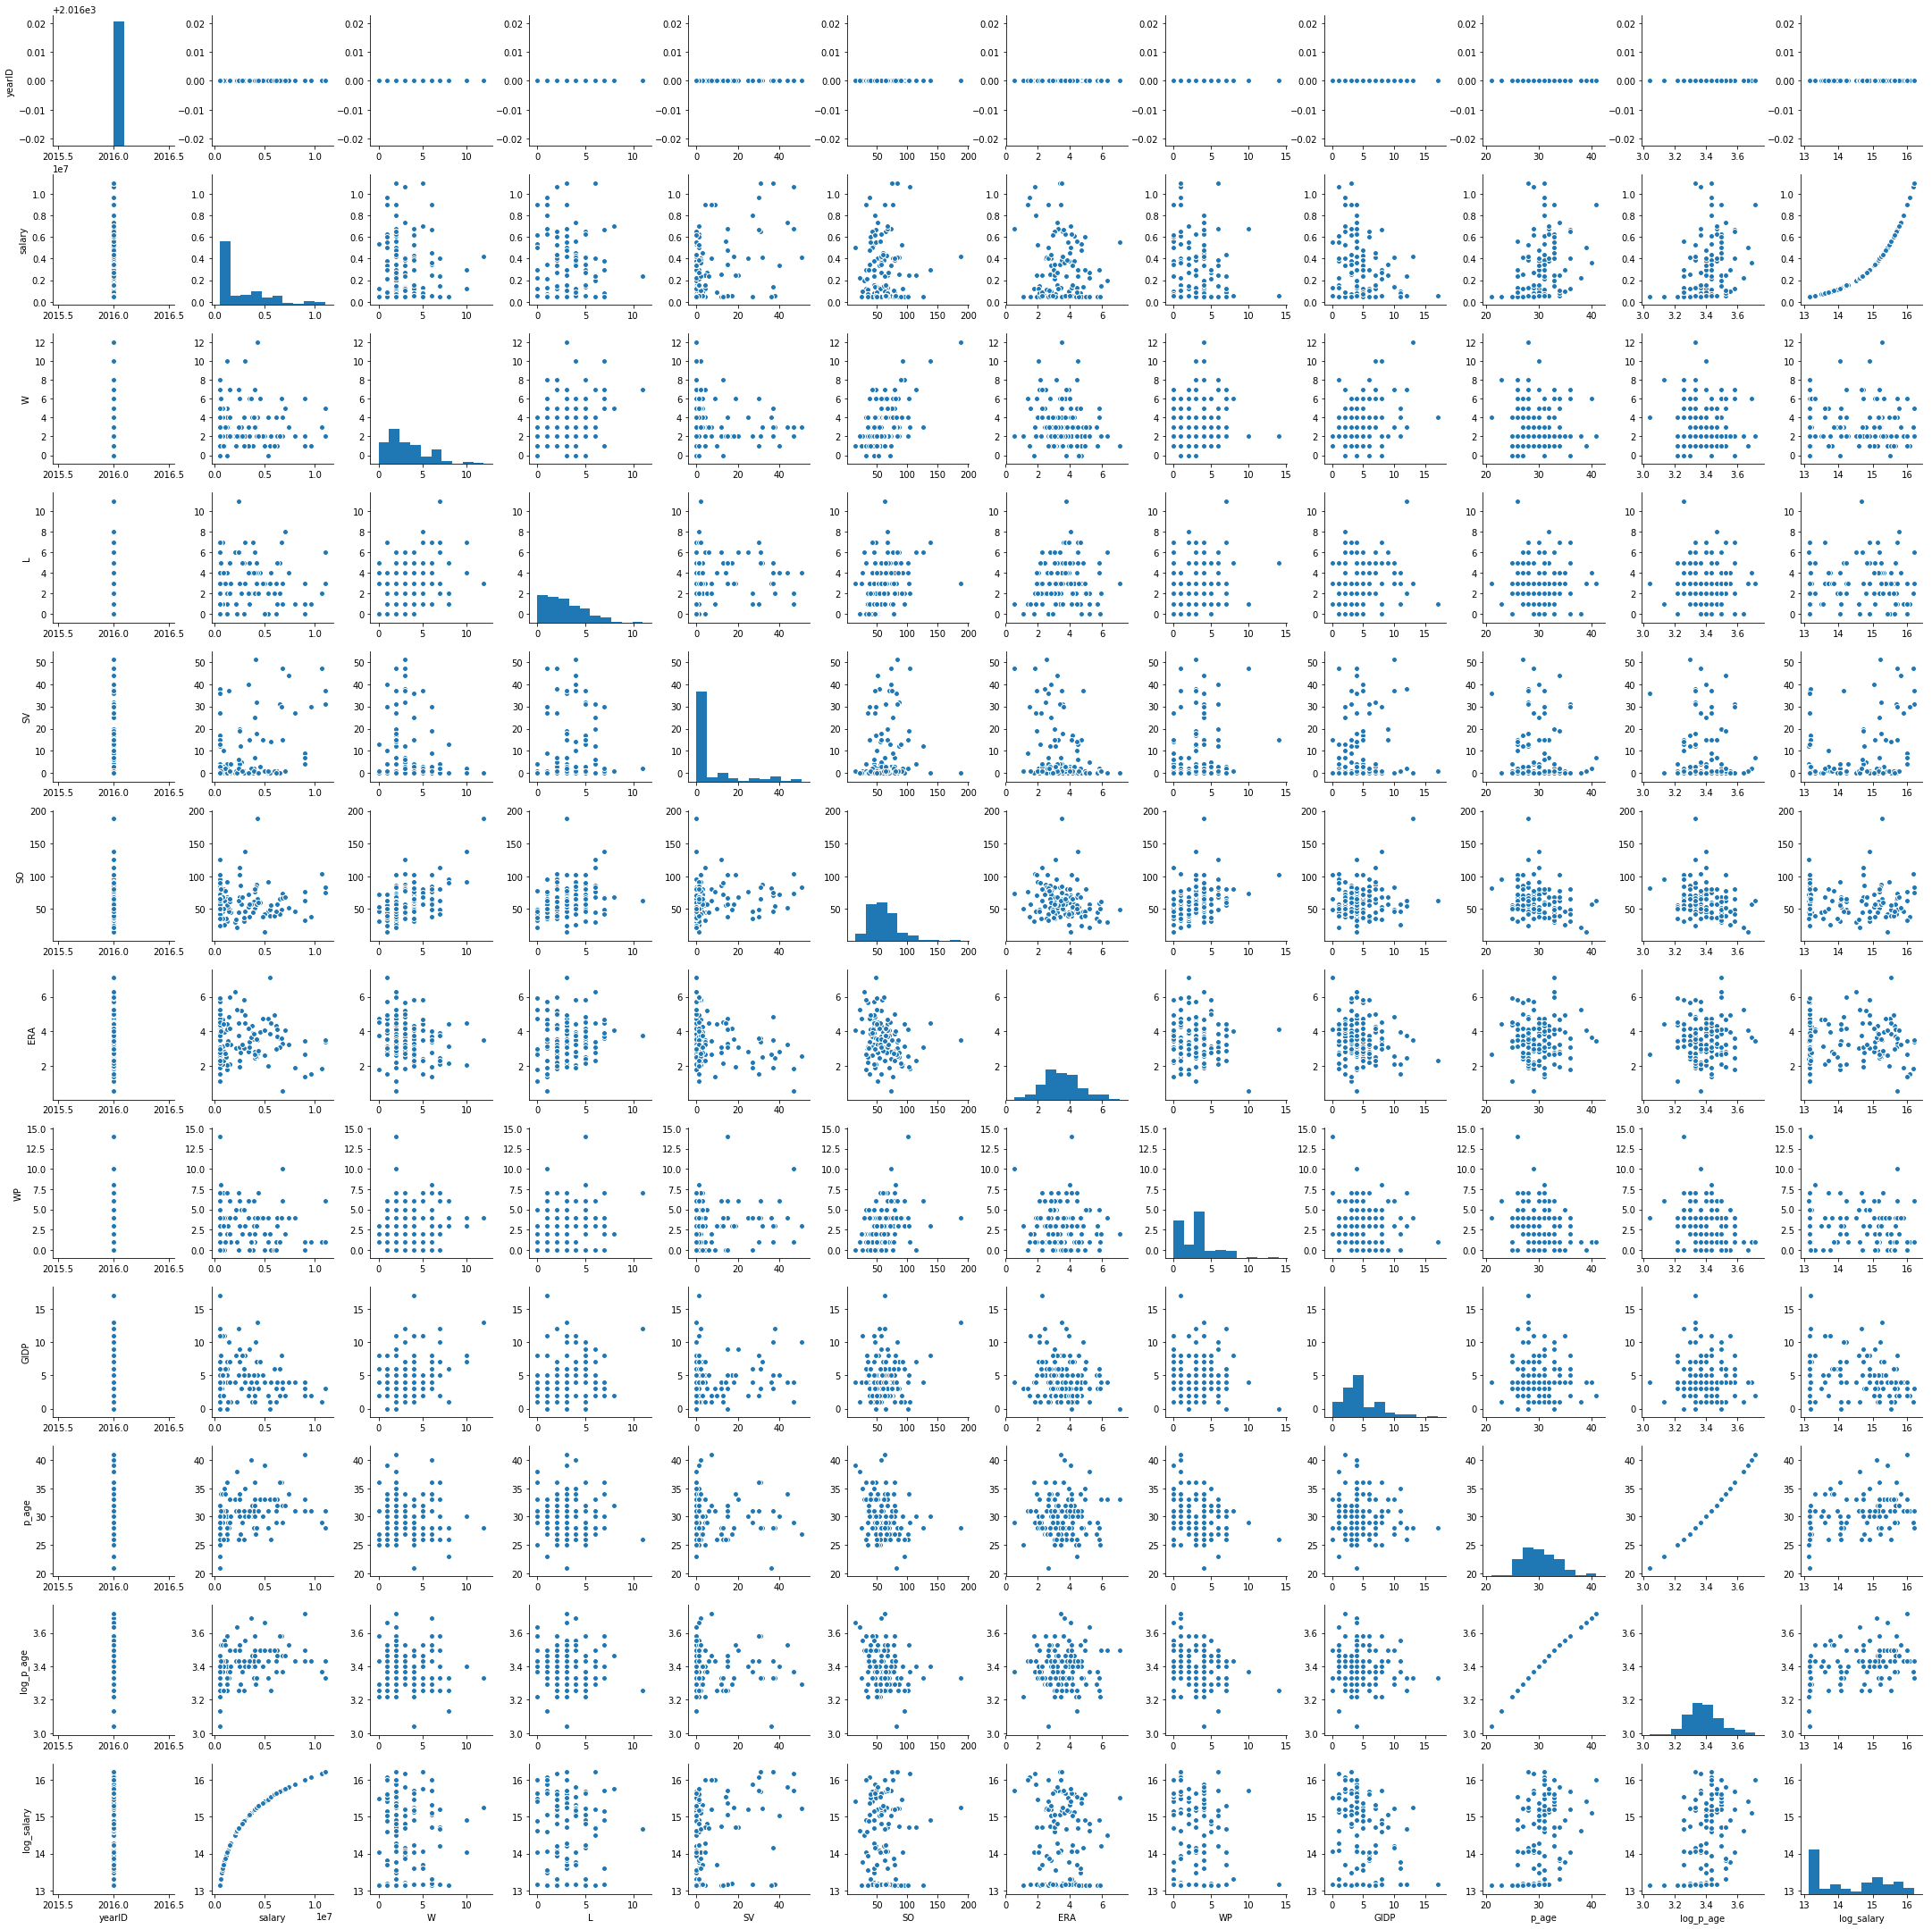

In [106]:
sns.pairplot(test2)

In [102]:
# Define the model
lm3 = smf.ols('log_salary ~ + b_age + HR', data=current_batdf2)

# Fit the model
fit3 = lm3.fit()
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     191.8
Date:                Thu, 25 Jan 2018   Prob (F-statistic):           8.65e-56
Time:                        16:37:30   Log-Likelihood:                -439.41
No. Observations:                 329   AIC:                             884.8
Df Residuals:                     326   BIC:                             896.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4959      0.391     19.161      0.000       6.726       8.265
b_age          0.2473      0.013     18.525      0.000       0.221       0.274
HR             0.0199      0.005      4.022      0.000       0.010       0.030
==============================================================================
Omnibus:                        1.234   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.285
Skew:                          -0.145   Prob(JB):                        0.526
Kurtosis:                       2.904   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

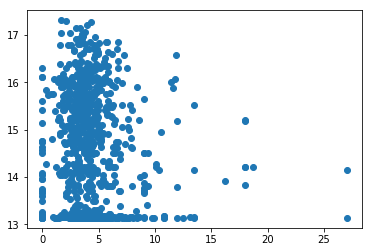

In [25]:
plt.plot(list(current_pitchdf['ERA']), list(current_pitchdf['log_salary']), 'o') 

In [26]:
current_batdf['salary']

14        1087500
15        1250000
16        1250000
80        8666000
81       11666667
115       2600000
116       2600000
117       3200000
124        509500
125        507700
131        534000
132       1650000
162        512500
179       6000000
219        508500
220        521600
230        511500
239       1500000
240       2000000
244       1725000
245        510000
336        547100
337       4150000
411       1650000
412       2650000
431        515500
435       2500000
436       3687500
441       4000000
443        509500
           ...   
27886    20000000
27887    19364801
27917      510500
27920      510500
27921      514500
27928     1700000
27929     1700000
27970      512800
27971      511900
27982      570000
27983     1000000
28020      675000
28021     4250000
28031     2500000
28032     6500000
28055     2250000
28098     1000000
28099     1000000
28226     5000000
28227     5500000
28228     5500000
28236    16500000
28237    18000000
28246    14000000
28247    1